# Importando as bibliotecas

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Primeiros passos para a limpeza dos dados
---

## Processos padrões iniciais, removendo duplicadas:

In [2]:
df_oly=pd.read_csv("df_athlete_events.csv")
df_oly.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [3]:
df_oly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


In [4]:
df_oly.describe(include=['object'])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


In [5]:
df_oly.Weight.unique()

array([nan, '75.0', '85.0', '64.0', '72.0', '90.0', '87.0', '49.0',
       'hsuahusahu', '76.0', '83.0', '86.0', '82.0', '55.0', '67.0',
       '60.0', '79.0', '96.0', '97.0', '70.0', '88.0', '56.0', '80.0',
       '59.0', '91.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0',
       '125.0', '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0',
       '92.0', '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0',
       '81.0', '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0',
       '120.0', '74.0', '110.0', '100.0', '66.0', '47.0', '116.0',
       '107.0', '53.0', '45.0', '105.0', '109.0', '156.0', '71.0', '98.0',
       '160.0', '106.0', '146.0', '44.0', '138.0', '141.0', '94.0',
       '118.0', '101.0', '39.0', '32.0', '112.0', '115.0', '74.5',
       '121.0', '135.0', '111.0', '43.0', '36.0', '67.5', '114.0',
       '132.0', '65.5', '42.0', '59.5', '127.5', '108.0', '35.0', '117.0',
       '103.0', '58.5', '214.0', '113.0', '146.5', '116.5', '140.0',
       '38.0', '

In [6]:
df_oly.Sex.unique()

array(['M', 'MALE', 'FEMALE', 'F', 'Vic vai te dar um socao',
       'P&D >> Comunidade'], dtype=object)

In [7]:
df_oly.Season.unique()

array(['Summer', 'Winter', '#ForaBolsonaro', 'Ele nunca', 'Ele não'],
      dtype=object)

In [8]:
df_oly.Medal.unique()

array(['Gold', nan, 'Bronze', 'Silver', 'Nelson'], dtype=object)

In [9]:
duplicados = df_oly[df_oly.duplicated(keep='first')]

In [10]:
df_oly.drop_duplicates(keep='first', inplace=True)

## Corrigindo os dados categóricos:


Limpando a coluna Sex:

In [11]:
df_oly["Sex"].replace("MALE", "M", inplace=True)
df_oly["Sex"].replace("FEMALE", "F", inplace=True)
df_oly["Sex"].replace("Vic vai te dar um socao", "M", inplace=True)
df_oly["Sex"].replace("P&D >> Comunidade", "F", inplace=True)
df_oly.Sex.unique()

array(['M', 'F'], dtype=object)

Limpando a coluna Medal:

In [12]:
df_oly["Medal"].replace("Nelson", df_oly["Medal"].mode()[0], inplace=True)

Limpando as colunas Team e Season: 

In [13]:
df_oly.drop(df_oly.loc[df_oly['Team']=='#ForaBolsonaro'].index, inplace=True)
df_oly.drop(df_oly.loc[df_oly['Team']=='Ele nunca'].index, inplace=True)
df_oly.drop(df_oly.loc[df_oly['Team']=='Ele não'].index, inplace=True)


In [14]:
df_oly.drop(df_oly.loc[df_oly['Season']=='Ele nunca'].index, inplace=True)
df_oly.drop(df_oly.loc[df_oly['Season']=='Ele não'].index, inplace=True)
df_oly.Season.unique()

array(['Summer', 'Winter'], dtype=object)

Trocando a coluna Weight para float, e substituindo o valor de string presente nela pela moda:

In [15]:
df_oly["Weight"].replace("hsuahusahu", df_oly["Weight"].mode()[0], inplace=True)
df_oly['Weight']= pd.to_numeric(df_oly["Weight"], downcast='float')

# Limpeza e primeiro contato com os dados numéricos: 

In [16]:
df_oly.describe().T

,count,mean,std,min,25%,50%,75%,max
Athlete_ID,45402.0,69127.445024,38873.640416,4.0,36095.5,68629.5,103192.0,135563.0
Age,44433.0,25.852407,5.953476,10.0,22.0,25.0,29.0,73.0
Height,35414.0,976.010250,34532.436234,132.0,170.0,178.0,185.0,1976779.0
Weight,34794.0,73.473801,14.875753,28.0,63.0,72.0,82.0,214.0
Year,45402.0,1972.345381,94.347961,-2992.0,1952.0,1984.0,2002.0,2016.0


## Limpando dados numéricos:

In [17]:
for i in df_oly.index:
  if df_oly["Height"][i] > 250: 
    df_oly["Height"] = df_oly["Height"].replace(df_oly["Height"][i], df_oly["Height"].mode()[0])
    

In [18]:
df_oly= df_oly.query('1800<Year<=2022')

# Visualizando os dados númericos:

Gráficos gerais: 

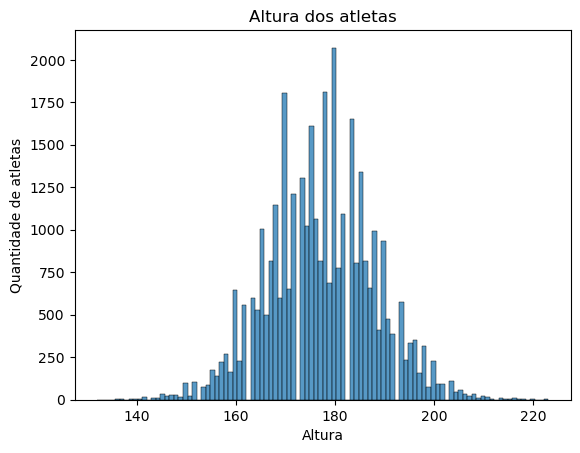

In [19]:
sns.histplot(df_oly["Height"].dropna())
plt.title("Altura dos atletas")
plt.ylabel("Quantidade de atletas")
plt.xlabel("Altura")
plt.show()

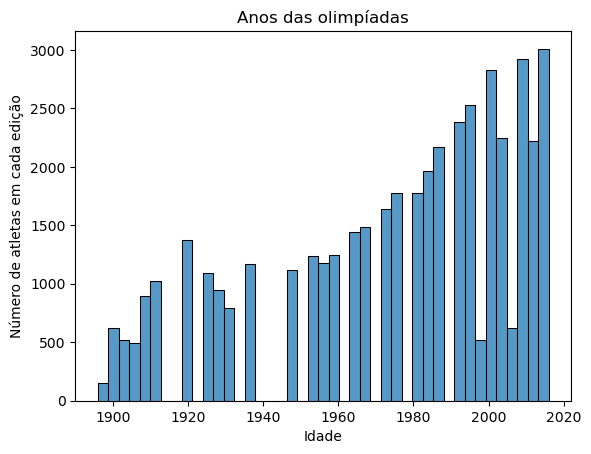

In [20]:
sns.histplot(df_oly["Year"].dropna())
plt.title("Anos das olimpíadas")
plt.ylabel("Número de atletas em cada edição")
plt.xlabel("Idade")
plt.show()

C:\Users\danif\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


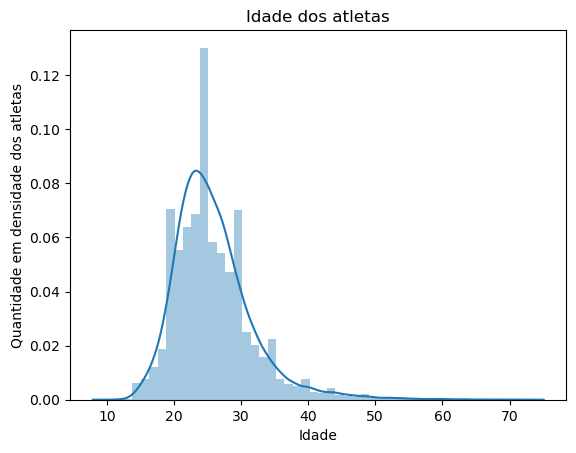

In [21]:
sns.distplot(df_oly["Age"].dropna())
plt.title("Idade dos atletas")
plt.ylabel("Quantidade em densidade dos atletas")
plt.xlabel("Idade")
plt.show()

C:\Users\danif\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


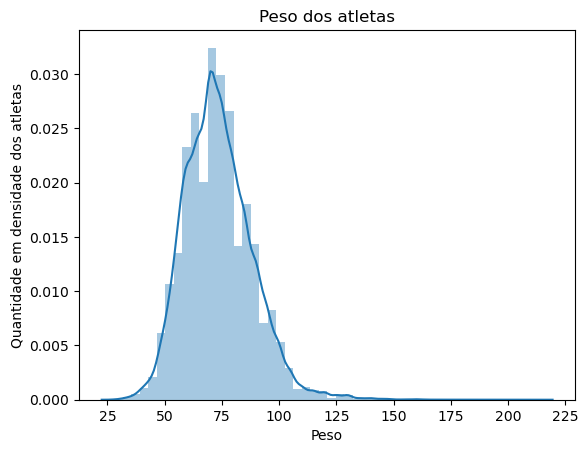

In [22]:
sns.distplot(df_oly["Weight"].dropna())
plt.title("Peso dos atletas")
plt.ylabel("Quantidade em densidade dos atletas")
plt.xlabel("Peso")
plt.show()

# Visualizando dados categóricos: 

Gráficos gerais: 

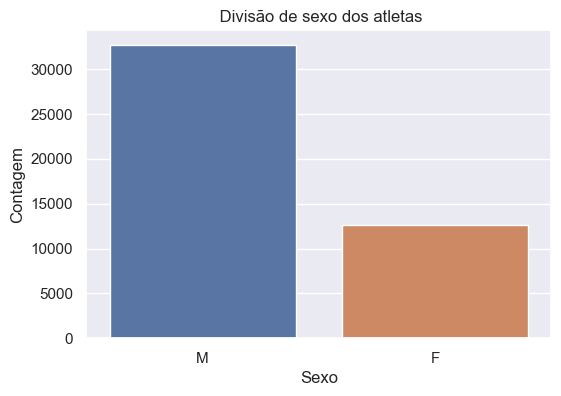

In [23]:
plt.figure(figsize= (6, 4))
sns.set_theme(style='darkgrid')
sns.countplot(x=df_oly["Sex"])
plt.title(" Divisão de sexo dos atletas")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.show()

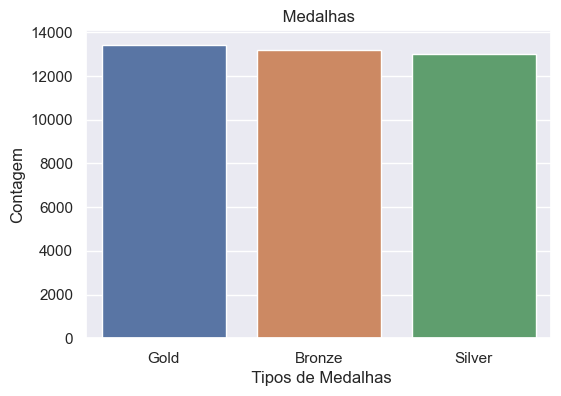

In [24]:
plt.figure(figsize= (6, 4))
sns.set_theme(style='darkgrid')
sns.countplot(x=df_oly["Medal"])
plt.title(" Medalhas ")
plt.xlabel(" Tipos de Medalhas")
plt.ylabel("Contagem")
plt.show()

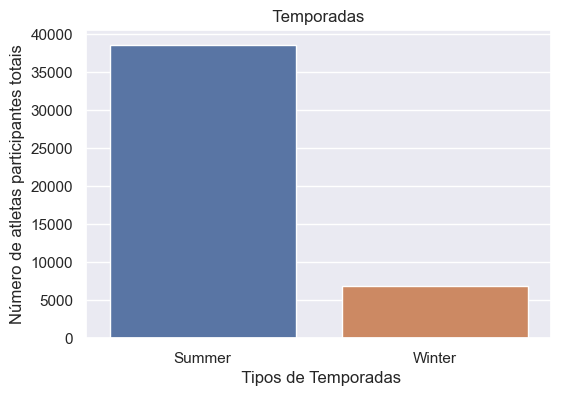

In [25]:
plt.figure(figsize= (6, 4))
sns.set_theme(style='darkgrid')
sns.countplot(x=df_oly["Season"])
plt.title(" Temporadas ")
plt.xlabel(" Tipos de Temporadas")
plt.ylabel("Número de atletas participantes totais")
plt.show()

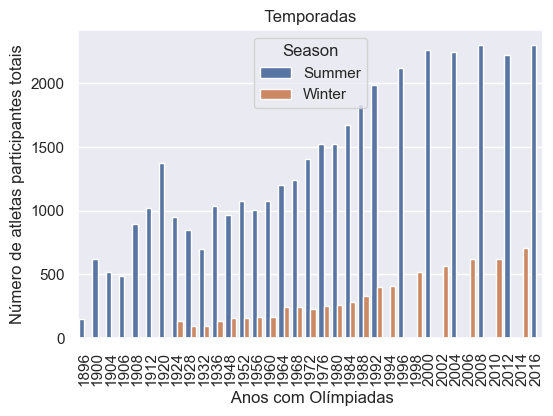

In [26]:
plt.figure(figsize= (6, 4))
sns.set_theme(style='darkgrid')
sns.countplot(data= df_oly, x=df_oly["Year"], hue='Season')
plt.xticks(rotation=90)
plt.title(" Temporadas ")
plt.xlabel(" Anos com Olímpiadas")
plt.ylabel("Número de atletas participantes totais")
plt.show()

A partir da primeira visualização dos dados categóricos é possível obter as seguintes informações:

1- Que o data frame em questão possuí muito mais atletas que participam em olímpiadas de verão do que de inverno.

2- A quantidade de atletas do sexo feminino corresponde a menos que a metade da quantidade de atletas masculinos.

3- O dataset trata em sua grande maioria de medalhistas.

# Começo da análise total dos dados:
---

## Usando FacetGrid e PairGrid para uma análise mais geral dos dados:

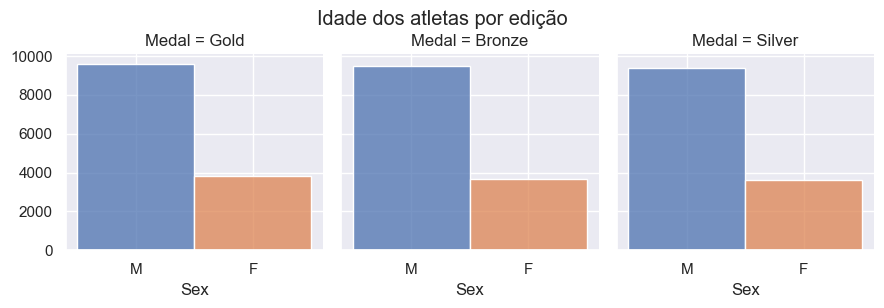

In [67]:
M = sns.FacetGrid(df_oly, col="Medal", hue= 'Sex')
M.map(sns.histplot, "Sex")
M.fig.suptitle("Idade dos atletas por edição", x= 0.5, y=1.02)
plt.show()

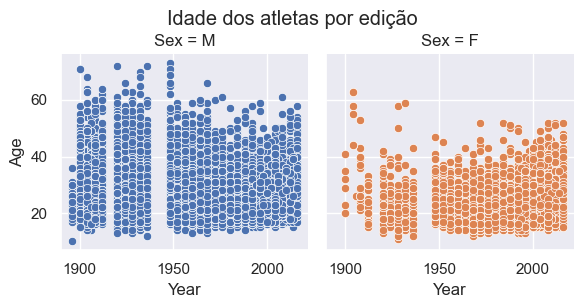

In [66]:
N = sns.FacetGrid(df_oly, col="Sex", hue= 'Sex')
N.map(sns.scatterplot, "Year", "Age")
N.fig.suptitle("Idade dos atletas por edição", x= 0.5, y=1.02)
plt.show()

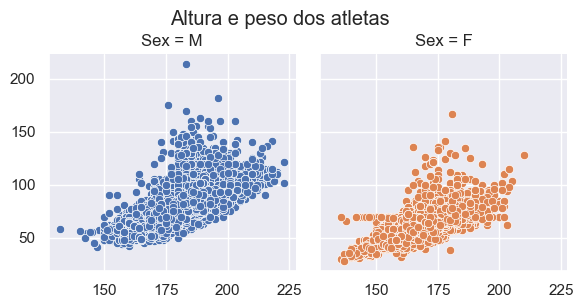

In [61]:
g = sns.FacetGrid(df_oly, col="Sex",hue= "Sex", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="Height", y="Weight")
g.fig.suptitle("Altura e peso dos atletas", x= 0.48, y=1.02)
plt.show()

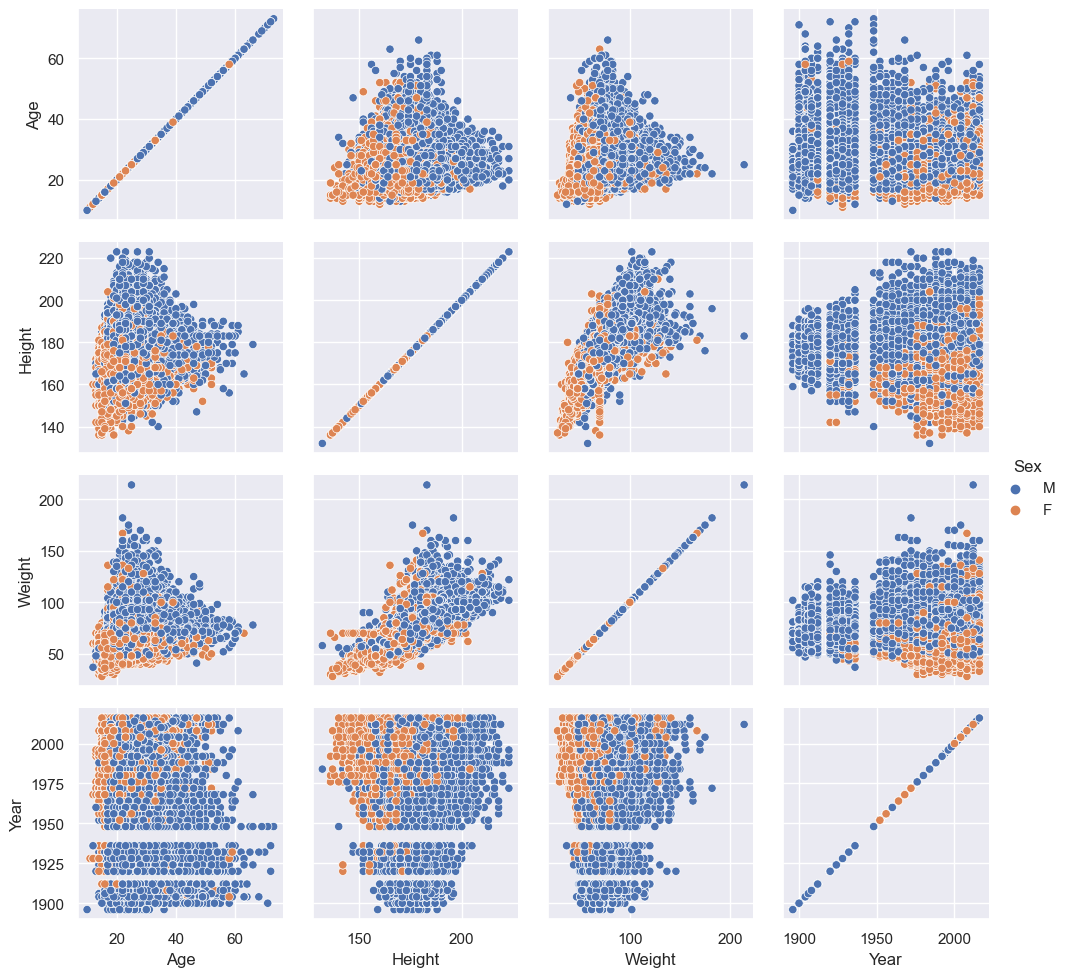

In [30]:
df_index= df_oly.copy()
df_index.set_index("Athlete_ID", inplace=True)
Y = sns.PairGrid(df_index, hue= 'Sex')
Y.map(sns.scatterplot)
Y.add_legend()
plt.show()

No geral, a utilização desses gráficos ajudou a reforçar a visaulização da diferença de gênero entre os atletas e como a quantidade de homens é de fato muito maior que a de mulheres,

## Gráficos para a visualização mais especifíca da diferença de gênero:

In [1]:
plt.figure(figsize=(18,14))
g=sns.relplot(data= df_oly, x= "Year", y="Age" , col= "Medal", hue= "Sex", style= "Sex")
g.fig.suptitle("Diferença de gênero considerando a idade em cada edição das olimpíadas", x= 0.48, y=1.02)
plt.show()

NameError: name 'plt' is not defined

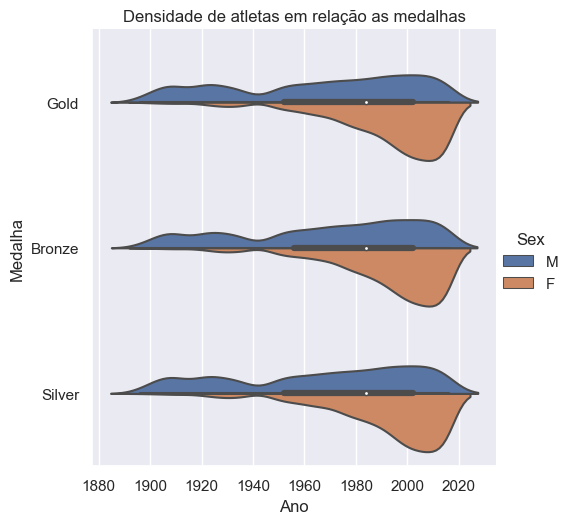

In [42]:
sns.catplot(data= df_oly, kind='violin', x= 'Year', y= "Medal", hue= "Sex", split= True)
plt.ylabel("Medalha")
plt.xlabel("Ano")
plt.title("Densidade de atletas em relação as medalhas")
plt.show()

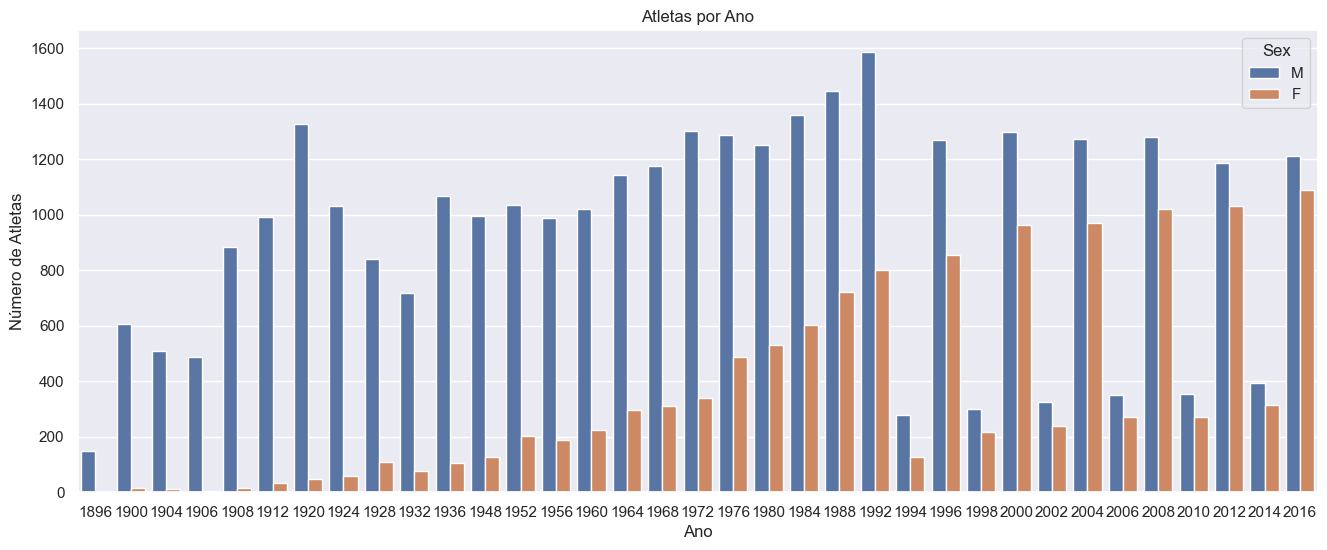

In [41]:
plt.figure(figsize = (16,6))
sns.countplot(x = "Year", data = df_oly, hue = 'Sex')
plt.ylabel("Número de Atletas")
plt.xlabel("Ano")
plt.title("Atletas por Ano")
plt.show()

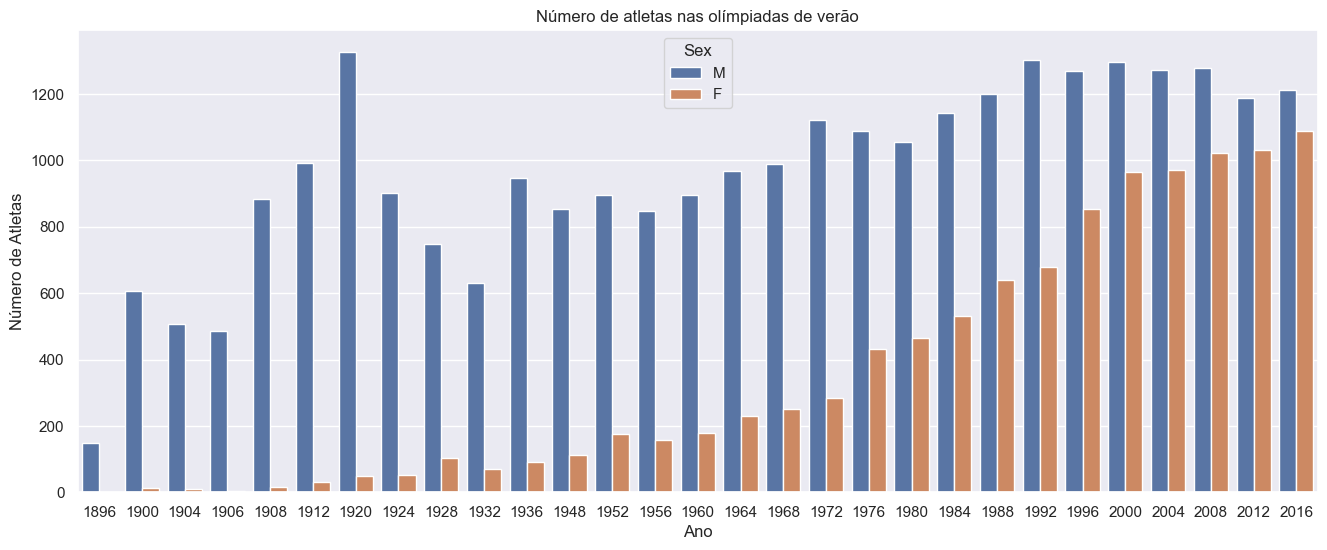

In [34]:
df_summer= df_oly.loc[df_oly['Season'] == 'Summer']
plt.figure(figsize = (16,6))
sns.countplot(x = "Year", data = df_summer, hue = 'Sex')
plt.ylabel("Número de Atletas")
plt.xlabel("Ano")
plt.title("Número de atletas nas olímpiadas de verão")
plt.show()

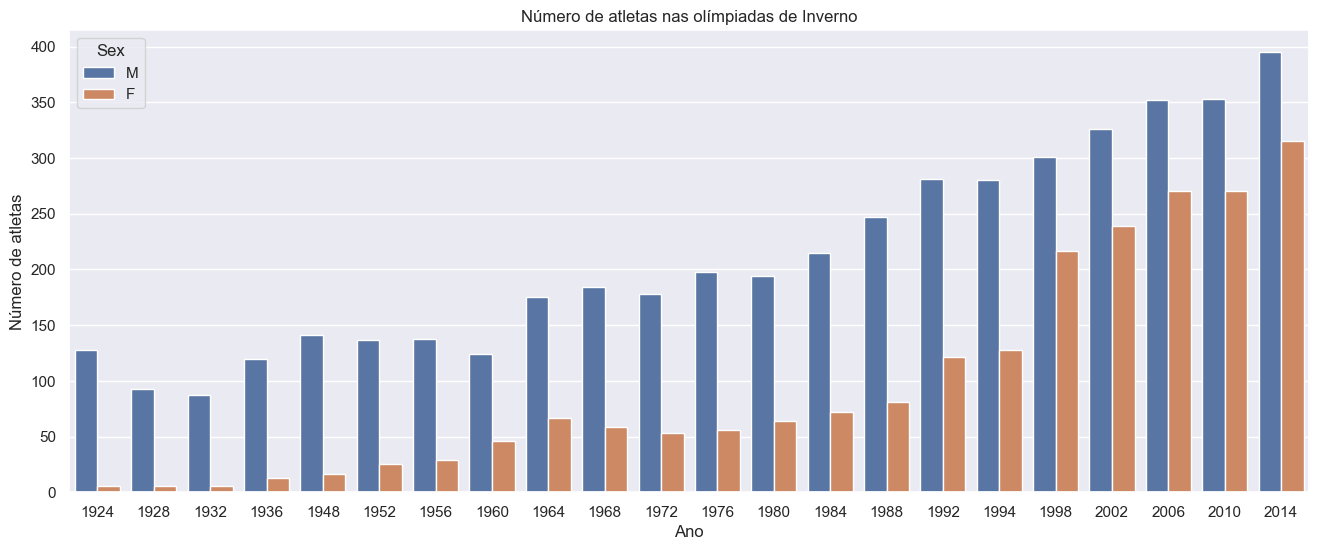

In [35]:
df_winter= df_oly.loc[df_oly['Season'] == 'Winter']
plt.figure(figsize = (16,6))
sns.countplot(x = "Year", data = df_winter, hue = 'Sex')
plt.ylabel("Número de atletas")
plt.xlabel("Ano")
plt.title("Número de atletas nas olímpiadas de Inverno")
plt.show()

Meu objetivo nesse setor foi criar uma visualização lógica das diferenças de gênero entre os atletas nas olímpiadas, diferenciando também olímpiadas de inverno e de verão. Nesse sentido, os gráficos acima novamente ajudaram a ressaltar a diferença númerica só que de forma mais detalhada e conectada, de certa forma, a uma visão mais temporal dessa questão. Outra característica interessante a ser observada é os dados de idade que podem ser observados mais especificamente no relplot, que demonstra que a maior concetração de atletas femininas nos jogos tem menos de 30 anos, principalmente nos jogos que ocorreram antes dos anos 2000.

# Análise mais centrada nos maiores medalhistas do dataset: 
---

Para analisar especificamente os maiores medalhistas optei por criar um novo dataframe:

In [36]:
medals= df_oly.copy()
medals=medals.drop(columns="Event")
medals=medals.drop(columns="City")
medals=medals.drop(columns="Height")
medals=medals.drop(columns="Weight")
medals.head()

,Athlete_ID,Name,Sex,Age,Team,NOC,Games,Year,Season,Sport,Medal
0,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,United States,USA,1992 Winter,1992,Winter,Cross Country Skiing,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Swimming,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Swimming,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,Finland,FIN,2014 Winter,2014,Winter,Ice Hockey,Bronze


In [37]:
medals['Contagem']= medals.groupby('Name')['Name'].transform('count')
medals.sort_values('Contagem', inplace= True, ascending=False)
big_medals= medals[medals['Contagem'] > 11]

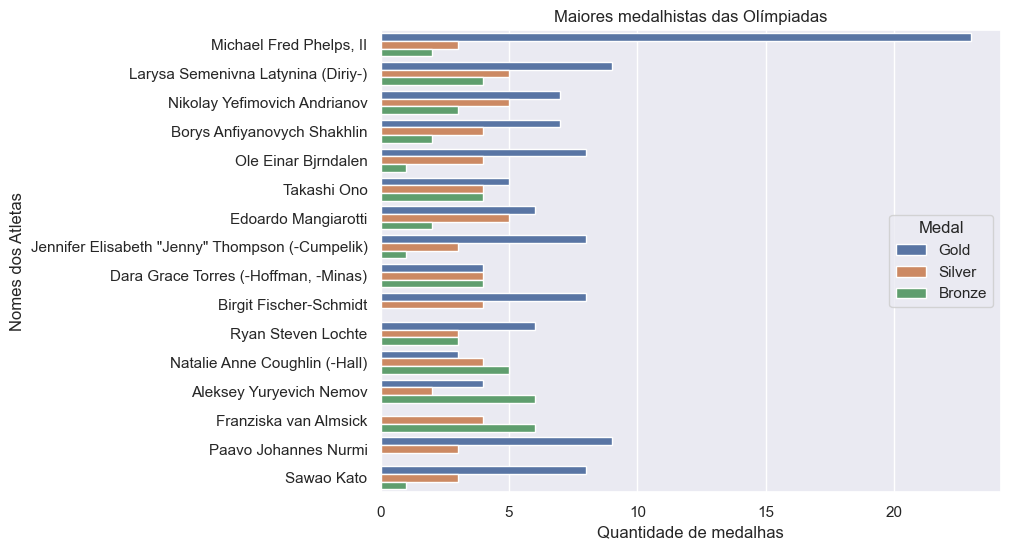

In [70]:
plt.figure(figsize=(8,6))
sns.countplot(data= big_medals, y= 'Name', hue= 'Medal', hue_order=['Gold', 'Silver', 'Bronze'])
plt.ylabel("Nomes dos Atletas")
plt.xlabel("Quantidade de medalhas")
plt.title("Maiores medalhistas das Olímpiadas")
plt.show()

Todos os atletas acima são atletas que se destacaram dos demais pela quantidade de medalhas olímpicas que obteram em sua carreira. É interessante observar que a maioria dos atletas são ou Russos ou Americanos.

## Analisando os países com maior número de medalhas no Data Set:

In [39]:
medals['Ranking']= medals.groupby('NOC')['NOC'].transform('count')
medals.sort_values('Ranking', inplace= True, ascending=False)
nacoes= medals[medals['Ranking'] > 447]

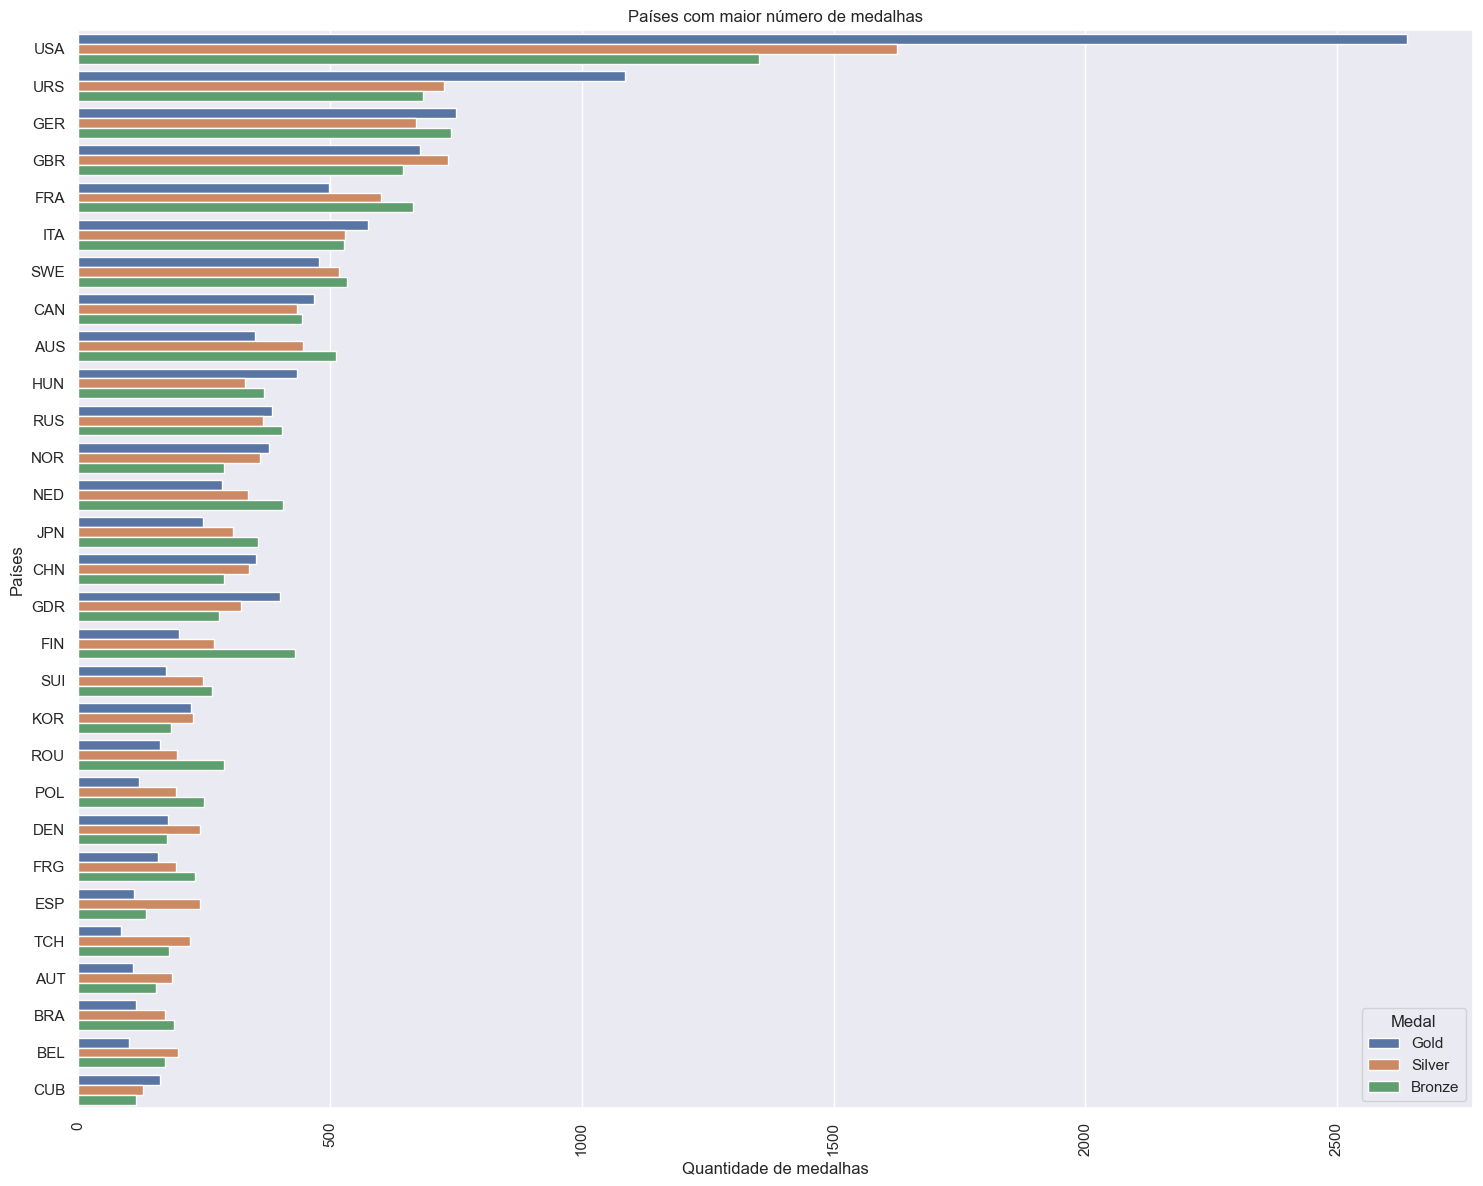

In [69]:
plt.figure(figsize=(18,14))
sns.countplot(data= nacoes, y= 'NOC', hue='Medal',hue_order=['Gold', 'Silver', 'Bronze'])
plt.xticks(rotation=90)
plt.ylabel("Países")
plt.xlabel("Quantidade de medalhas")
plt.title("Países com maior número de medalhas")
plt.show()

Como esperado, países como os Estados Unidos e Rússia possuem mais medalhas por terem mais participações nos eventos e maior estruturação em seus setores esportivos, países mais desenvolvidos tendem ao topo do gráfico nesse sentido.

# Conclusão: 
---

Com esse projeto consegui treinar e aprimorar minhas habilidades relacionadas a limpeza e análise de dados, além da capacidade de visualizar as informações através de bibliotecas como o Seaborn e o Matplotlib. Nesse DataFrame em específico fui capaz de observar que muitos dos dados são interpretados facilmente e de certa forma previsíveis, tanto em suas relações como também em suas tendências.

Apesar da falta de análises mais complexas, é possível observar que os jogos olímpicos no geral passaram por muitas mudanças em sua estrutura, acrescentando e removendo diversos esportes, ou alterando também regras de participação e representação no geral. Muito diferente de seu começo em 1896, os jogos olímpicos vem se tornando um palco acessível para o público entender, apreciar e exaltar a diversidade presente no planeta, além de estabelecer um espaço importante de fala e de afirmação para diversos atletas. 